In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import requests
from urllib.parse import urlencode

In [2]:
sns.set(
    font_scale=1.5,
    style="whitegrid",
    rc={'figure.figsize':(14,8)}
        )

Представьте, что вы работаете аналитиком в компании, которая занимается арендой велосипедов. Коллега из офиса в Лондоне прислал вам данные за два года: с 4 января 2015 по 3 января 2017. Вам предстоит изучить динамику числа аренд, наличие связи с погодными условиями и выходными, а также объяснить несколько аномалий на графике.

### Описание данных
timestamp – дата и время (точность до часа)  
cnt – количество аренд велосипедов за этот час  
t1 – температура, в С  
t2 – температура "ощущается как", в С   
hum – влажность (%)  
wind_speed – скорость ветра, км/ч  
weather_code – погодные условия:  
1 – ясно (SKC)  
2 – преимущественно ясно / встречаются отдельные облака (SCT)  
3 – облачно / значительные облака (BKN)  
4 – пасмурно (OVC)  
7 – небольшой дождь Rain/ light Rain shower/ Light rain   
10 – дождь с грозой  
26 – снегопад   
94 – ледяной туман (да, такое бывает!)  
isholiday – является ли день праздником (1 – праздник, 0 – нет)  
isweekend –  является ли день выходным (1 – выходной, 0 – нет)  
season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)  

In [3]:
# Ссылка с данными аренды велосипедов
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/c4t6B6OFDANVbg'

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

In [4]:
# Загружаем данные из ссылки
rent_bicycle = pd.read_csv(download_url, parse_dates=['timestamp'])

In [5]:
rent_bicycle.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [6]:
# Смотрим тип данных
rent_bicycle.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [7]:
# Проверяем даннные на наличие пустых значений
rent_bicycle.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

1. Для начала попробуем посмотреть на число поездок по датам и времени. Постройте график, где:  
по оси x – дата (timestamp)  
по оси y – число поездок (cnt)  

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

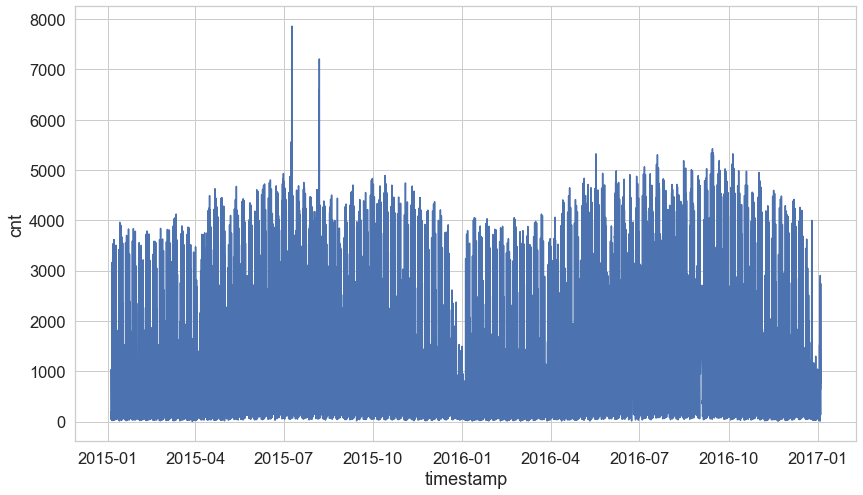

In [8]:
#plt.figure(figsize=(12,8))
sns.lineplot(data=rent_bicycle, x='timestamp', y='cnt')

С этими данными мы получаем нечитаемый график

2. Отлично! Предположим, что данные действительно нужно немного преобразовать. В этом нам поможет resample, с которым вы могли столкнуться в дополнительных темах pandas. Этот метод позволяет преобразовать данные и применить к какому-либо столбцу другой метод (напр. sum). Так можно рассчитать показатели, например, за весь день или месяц, имея данные с точностью до минут.  
Агрегируйте число поездок по дням и визуализируйте результат. Что вы можете сказать о полученном графике?

In [9]:
# Для начала отсортируем данные по дате и установим в качестве индекса
rent_bicycle.sort_values('timestamp',inplace=True)
rent_bicycle.set_index('timestamp', inplace=True)

In [10]:
rent_bicycle

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


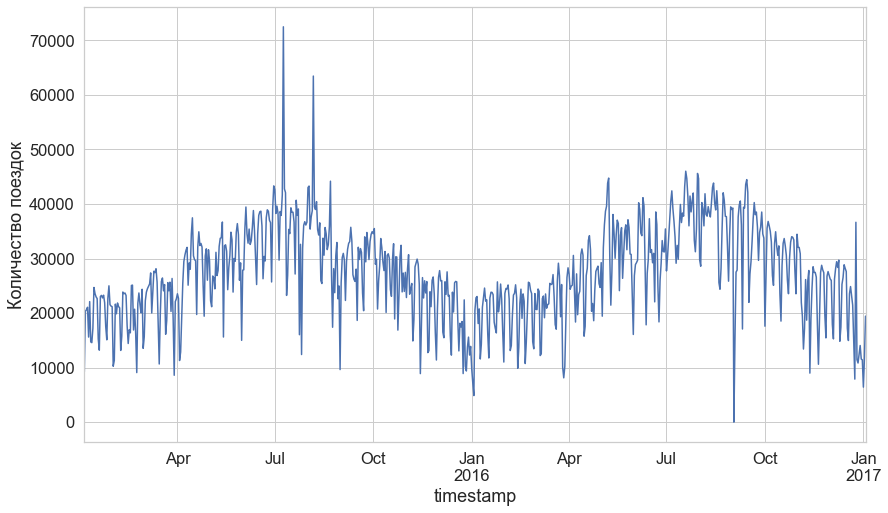

In [11]:
# Строим график с преобразованными данными
plt.ylabel('Количество поездок')
rent_bicycle.resample(rule='D').cnt.sum().plot()
plt.show()

По данному графику мы можем сказать, что у аренды велосипедов есть сезонность. Летом повышается аренда, а зимой понижается. Есть аномальные пики. Есть несколько дней, где аренда превышала 60000 поездок. Также есть день, когда аренда была равна 0

3. Итак, вы обнаружили на графике некоторые скачки. Давайте проверим, что же могло произойти в тот день 🤔.

Для этого разделим дальнейшие действия на несколько этапов:  

сначала посчитаем скользящее среднее, чтобы сгладить ряд  
далее – разницу между наблюдаемыми и сглаженными значениями  
определим верхние и нижние границы 99% доверительного интервала  
найдем причины аномалий!

In [12]:
# Сохраняем таблицу из предыдущего шага
rent_per_day = rent_bicycle.resample(rule='D').cnt.sum()
rent_per_day = rent_per_day.reset_index()

In [13]:
rent_per_day.head()

,timestamp,cnt
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601


In [14]:
# Считаем скользящее среднее с окном в 3 дня
roll_rent_per_day = rent_per_day.rolling(window=3).mean()

In [15]:
roll_rent_per_day.head()

,cnt
0,NaN
1,NaN
2,16739.666667
3,20683.000000
4,19092.666667


In [16]:
np.std(rent_per_day - roll_rent_per_day).cnt

4558.586641117938

In [17]:
# Расчитываем стандартное отклонение разницы среднего и скользящего среднего
std = np.std(rent_per_day - roll_rent_per_day).cnt
std

4558.586641117938

In [18]:
roll_rent_per_day.head()

,cnt
0,NaN
1,NaN
2,16739.666667
3,20683.000000
4,19092.666667


In [19]:
# Считаем верхнюю и нижнюю границу 99% доверительного интервала
roll_rent_per_day['upper_bound'] = roll_rent_per_day.cnt + std * 2.576 
roll_rent_per_day['lower_bound'] = roll_rent_per_day.cnt - std * 2.576 

In [20]:
roll_rent_per_day.head()

,cnt,upper_bound,lower_bound
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,16739.666667,28482.585854,4996.747479
3,20683.000000,32425.919188,8940.080812
4,19092.666667,30835.585854,7349.747479


In [21]:
# находим данные с аномально высокими значениями, которые выходят за рамки 99% доверительного интервала
anomaly_up = rent_per_day.loc[rent_per_day.cnt > roll_rent_per_day.upper_bound]
anomaly_up

,timestamp,cnt
186,2015-07-09,72504
214,2015-08-06,63468
609,2016-09-04,27512
721,2016-12-25,36653


4. В какой день значение числа аренд оказалось наибольшим?
Подумайте, в чем может быть причина столь высокого числа аренд в этот день. Для этого можете исследовать уже имеющиеся переменные в датасете, проверить наличие ошибок в данных (повторяющихся строк), а также использовать поиск Google. 

In [22]:
# Смотрим данные за каждый час в самый аномальный день
rent_bicycle.loc['2015-07-09']

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-07-09 00:00:00,400,16.0,16.0,55.0,14.0,1.0,0.0,0.0,1.0
2015-07-09 01:00:00,212,15.5,15.5,59.0,14.0,1.0,0.0,0.0,1.0
2015-07-09 02:00:00,111,14.0,14.0,67.0,15.0,1.0,0.0,0.0,1.0
2015-07-09 03:00:00,81,14.0,14.0,63.0,18.5,1.0,0.0,0.0,1.0
2015-07-09 04:00:00,76,14.0,14.0,63.0,18.0,1.0,0.0,0.0,1.0
2015-07-09 05:00:00,269,13.0,13.0,67.0,17.0,1.0,0.0,0.0,1.0
2015-07-09 06:00:00,1724,13.0,13.0,67.0,16.0,1.0,0.0,0.0,1.0
2015-07-09 07:00:00,5309,13.5,13.5,65.0,17.0,1.0,0.0,0.0,1.0
2015-07-09 08:00:00,7531,14.5,14.5,61.0,19.0,2.0,0.0,0.0,1.0


Резкий скачок аренды начинается с 7 утра и продолжается до 9, затем такой же скачок обнаруживается с 16 до 18 часов. Показатели погоды обычные, этот день не является выходным или праздником. Вероятнее всего это как-то связано с рабочим графиком, когда люди добираются до работы/учебы и едут домой обратно

Если мы воспользуемся поиском новостей по данной дате в Лондоне, то обнаружим, что в тот день происходила забастовка в метро и люди не могли добраться до работы с помощью любого вида транспорта, метро не работало, а на обычной дороге были сильнейшие пробки из-за закрытия метро. Так что часть людей решило добираться с помощью велосипеда до пункта назначения 

5. Проделайте аналогичную операцию для дней, когда число аренд оказалось ниже ожидаемого. В чем может быть причина падения числа аренд 2016-09-02?

In [23]:
# Расчитываем дни с аномально низкой арендой велосипедов
anomaly_down = rent_per_day.loc[rent_per_day.cnt < roll_rent_per_day.lower_bound]
anomaly_down

,timestamp,cnt
130,2015-05-14,15609
189,2015-07-12,23240
201,2015-07-24,16034
232,2015-08-24,17400
314,2015-11-14,8898
607,2016-09-02,0
615,2016-09-10,17080
621,2016-09-16,21967
678,2016-11-12,8990


In [24]:
rent_bicycle.loc['2016-09-02']

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,


Как мы видим, данные за этот день в принципе отсутствуют, если бы была нулевая аренда, тогда были данные за каждый час где столбец cnt был бы равен 0. Так как этих данных нет, мы можем сказать об ошибки записи данных, из-за которых этот день отстутствует в данной таблице